# Aula 08 - Curva ROC-AUC

Veremos agora uma outra métrica de avaliação de modelos de classificação, que é a **AUC (Area Under The Curve) da curva ROC (Receiver Operating Characteristics)**, por vezes chamada de **AUROC (Area Under the Receiver Operating Characteristics)**

A curva **ROC é uma curva de probabilidade**, sendo que **AUC é a área sob a curva**, representando **o grau de separabilidade atingido pelo modelo**.

Ou seja, esta medida nos diz **o quanto o modelo é capaz de distinguir entre duas classes**.

A curva ROC é construída com a **taxa de falsos positivos** no eixo x, e a **taxa de verdadeiros positivos** no eixo y, para diferentes **thresholds de classificação**:

<img src="https://miro.medium.com/max/1175/1*2nd7NTEBosPakccmLVWy9A.png" width=500>

O valor do AUC-ROC sempre estará **entre 0 e 1**, sendo que **quanto mais próximo de 1, melhor o modelo**.

> Valores de AUC-ROC maiores que 0.5 (mais próximos de 1) significam que o modelo tem uma **taxa de veridadeiros positivos maior que a taxa de falsos positivos**, ou seja, o modelo está acertando mais!

Quanto **mais próximo de 0** (para valores abaixo de 0.5), teremos um modelo que faz um bom trabalho em separar as classes, mas as classifica erroneamente.

E, quanto **mas próximo de 0.5**, pior é o modelo em separar as classes: seria um modelo que simplesmente chuta aleatoriamente ora a classe 0, ora a classe 1. Veja as imagens a seguir para uma ilustração:

<img src="https://miro.medium.com/max/528/1*Uu-t4pOotRQFoyrfqEvIEg.png" width=500>


<img src="https://miro.medium.com/max/507/1*yF8hvKR9eNfqqej2JnVKzg.png" width=500>


<img src="https://miro.medium.com/max/430/1*iLW_BrJZRI0UZSflfMrmZQ.png" width=500>


<img src="https://miro.medium.com/max/556/1*aUZ7H-Lw74KSucoLlj1pgw.png" width=500>

Ao olhar para a curva em si, temos a seguinte interpretação:

<img src="https://i.ytimg.com/vi/J9l8J1MeCbY/hqdefault.jpg" width=400>

Para ficar mais claro, aqui temos alguns exemplos de curvas...
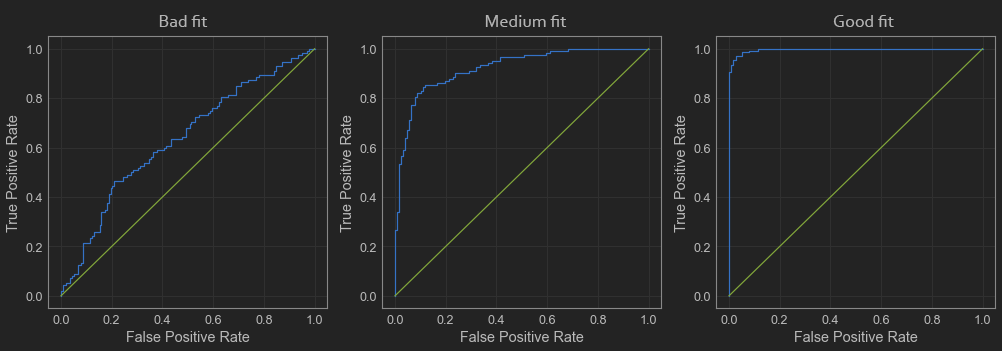

E o que representa na realidade...
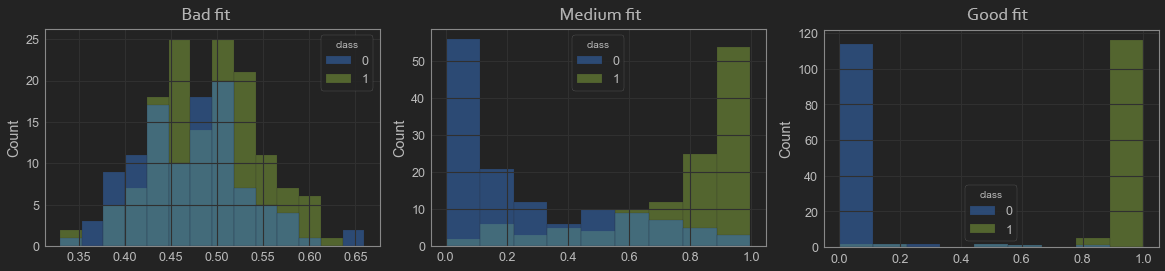

Utilizando esse score podemos comparar diferentes modelos, sejam vindo do mesmo algoritmo ou não!!!

[Leitura complementar sobre curva ROC](https://www.ahajournals.org/doi/full/10.1161/CIRCULATIONAHA.105.594929#:~:text=Receiver%2Doperating%20characteristic%20(ROC),from%20noise%20in%20radar%20detection.)

Vamos, agora, a um exemplo prático para ilustrar a curva ROC de diferentes modelos, usando o dataset de crédito com o qual já trabalhamos em aulas anteriores!

In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [112]:
df = pd.read_csv("german_credit_data.csv", index_col = 0)

In [113]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [114]:
X = df.drop(columns = "Risk")
y = df["Risk"].apply(lambda x: 1 if x == 'bad' else 0)

In [115]:
y

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: Risk, Length: 1000, dtype: int64

Vamos, agora, executar o pipeline usual de treinamento e teste, sem nos preocuparmos com otimização de hiperparâmetros:

In [116]:
from sklearn.metrics import roc_auc_score

In [130]:
KNN.predict_proba(X_test)[:, 1] # probabilidades de escolher pela classe "1" (nosso "positivo" do problema)

array([0.6, 0. , 0. , 0.2, 0.2, 0.4, 0.2, 0. , 0.8, 0. , 0.6, 0.6, 0.2,
       0.4, 0.6, 0. , 0.4, 0.2, 0.4, 0.2, 0.6, 0.2, 0.2, 0.2, 0.4, 0.4,
       0.4, 0.4, 0.4, 0.2, 0.2, 0. , 0.2, 0.6, 0.4, 0.2, 0.4, 0.6, 0.2,
       0.4, 0.4, 0.2, 0. , 0.4, 0.2, 0. , 0.2, 0. , 0.2, 0.4, 0.4, 0.4,
       0. , 0. , 0.6, 0. , 0.6, 0.8, 0. , 0.2, 0. , 0. , 0.4, 0.6, 0.4,
       0. , 0.2, 0.2, 0. , 0. , 0.2, 0.2, 0.2, 0. , 0. , 0.4, 0.4, 0. ,
       0.4, 0.2, 0.6, 0.4, 0.6, 0.2, 0.2, 0.4, 0.6, 0.8, 0.2, 0.4, 0.4,
       0. , 0.2, 0. , 1. , 0.8, 0. , 0.4, 0.4, 0.4, 0.4, 0. , 0.4, 0. ,
       0.4, 0.4, 0.2, 0.6, 0.6, 0. , 0. , 0.6, 0.6, 0.8, 0.2, 0.4, 0.2,
       0.4, 0.8, 0.4, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0.6, 0.4, 0.4, 0.4,
       0.2, 0.6, 0.6, 0.2, 0.8, 0.4, 0. , 0.4, 0.2, 0.2, 0.4, 0. , 0.8,
       0.2, 0.2, 0.2, 0. , 0.2, 1. , 0.4, 0.6, 0.2, 0. , 0.4, 0.2, 0. ,
       0.4, 0.4, 0.2, 0.2, 0.8, 0.4, 0. , 0.6, 0.4, 0.2, 0. , 0. , 0.2,
       0.4, 0.2, 0. , 0. , 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.2, 0.

In [163]:
# Treinando os modelos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KNN = KNeighborsClassifier(n_neighbors = 12)
DT = DecisionTreeClassifier(max_depth = 5)
RF = RandomForestClassifier(max_depth = 5, n_estimators = 1000, random_state = 42)

KNN.fit(X_train, y_train)
DT.fit(X_train, y_train)
RF.fit(X_train, y_train)

# Medindo a performance dos modelos
KNN_predictions = KNN.predict_proba(X_test)[:,1]
DT_predictions = DT.predict_proba(X_test)[:,1]
RF_predictions = RF.predict_proba(X_test)[:,1]

print("=== KNN ===")
print(f"\nROC AUC KNN: {roc_auc_score(y_test, KNN_predictions)}")
print(f"{classification_report(y_test, KNN.predict(X_test))}")

print("=== DT ===")
print(f"\nROC AUC DT: {roc_auc_score(y_test, DT_predictions)}")
print(f"{classification_report(y_test, DT.predict(X_test))}")

print("=== RF ===")
print(f"\nROC AUC DT: {roc_auc_score(y_test, RF_predictions)}")
print(f"{classification_report(y_test, RF.predict(X_test))}")


=== KNN ===

ROC AUC KNN: 0.6323047619047619
              precision    recall  f1-score   support

           0       0.71      0.96      0.82       175
           1       0.53      0.11      0.18        75

    accuracy                           0.70       250
   macro avg       0.62      0.53      0.50       250
weighted avg       0.66      0.70      0.63       250

=== DT ===

ROC AUC DT: 0.6390095238095238
              precision    recall  f1-score   support

           0       0.73      0.93      0.81       175
           1       0.52      0.19      0.27        75

    accuracy                           0.70       250
   macro avg       0.62      0.56      0.54       250
weighted avg       0.66      0.70      0.65       250

=== RF ===

ROC AUC DT: 0.7257142857142859
              precision    recall  f1-score   support

           0       0.74      0.98      0.84       175
           1       0.78      0.19      0.30        75

    accuracy                           0.74       2

In [141]:
from sklearn.metrics import roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

In [157]:
def plot_roc_curve(y_real, y_pred, roc_auc):
    # Calculamos os pontos da curva
    fpr, tpr, thr = roc_curve(y_real, y_pred)
    
    # Mostrando a curva
    roc_display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc).plot()
    
    plt.plot([0,1], [0,1], 'g')

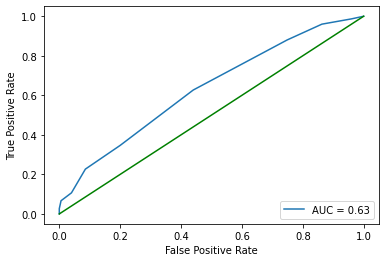

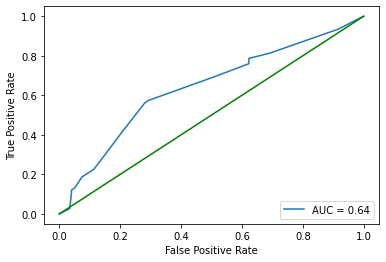

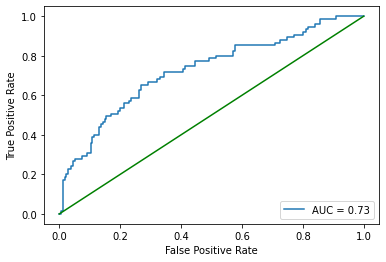

In [164]:
plot_roc_curve(y_test, KNN_predictions, roc_auc_score(y_test, KNN_predictions))
plot_roc_curve(y_test, DT_predictions, roc_auc_score(y_test, DT_predictions))
plot_roc_curve(y_test, RF_predictions, roc_auc_score(y_test, RF_predictions))

Poderíamos continuar iterando sobre os modelos para otimizar hiperparâmetros, com o processo que já estamos acostumados a fazer, ou seja: definir o grid de parâmetros que queremos otimizar, escolher uma métrica de otimização, e fazer o processo! Que tal tentar como exercício?

# Voltamos às 21h01